In [1]:
from primordialpy.background import Background
from primordialpy.model import PotentialFunction
from primordialpy.perturbations import  Perturbations
import matplotlib.pyplot as plt

In [2]:
#Starobinsky potential
V = 'lambda_h*(1 - exp(-sqrt(2/3)*phi) )**2/(4*xi**2)'
param = {'lambda_h' : 0.13, 'xi': 17000}
potential = PotentialFunction.from_string(V, param_values=param) #Instancia de la clase Potential para el modelo R^2

#Creando instancia de la clase Background. Resuelve automáticamente el sistema dada la condición inicial del inflatón
background = Background(potential, phi0 = 5.7) 
background.solver()


In [3]:
#Extrayendo datos de la clase background

vars = ['N', 'phi', 'dphidN', 'H', 'a', 'aH', 'eps_H', 'eta_H']
N, phi, dphidN, H, a, aH, eps_H, eta_H = (background.data(save=True)[i] for i in vars)
Nend = background.data()['N'][-1]

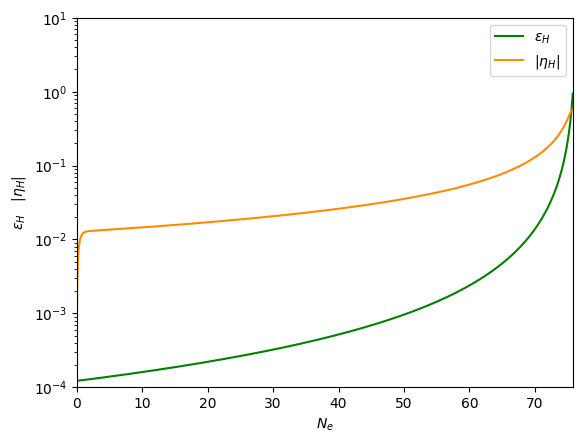

In [4]:
plt.plot(N, eps_H, label = r'$\epsilon_H$', color = 'green' )
plt.plot(N, abs(eta_H), label = r'$|\eta_H |$', color = 'darkorange')


plt.yscale('log')
plt.ylim(1e-4, 10)
plt.xlim(0, Nend)

plt.xlabel(r'$N_e$')
plt.ylabel(r'$\epsilon_H\quad |\eta_H|$')
plt.legend(loc = 'best')
#plt.title('Slow-roll parameters')


In [5]:
pert = Perturbations(potential, background, scale= 'CMB', N_CMB = 56.)
sol = pert.Power_spectra_pivot()


Curvature power spectrum at pivot scale is 2.148911119991696e-09
Tensor to scalar ratio at pivot scale is 0.0034281369183308207


In [6]:
PS = pert.Power_spectrum(save= True)

Computing P(k): 1000it [01:36, 10.41it/s]


/Users/flaviopineda/Desktop/primordialpy/primordialpy/perturbations.py:635: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(loc='best')


Figure saved as: Figures/spectrum_scalar.png


<Figure size 800x500 with 0 Axes>

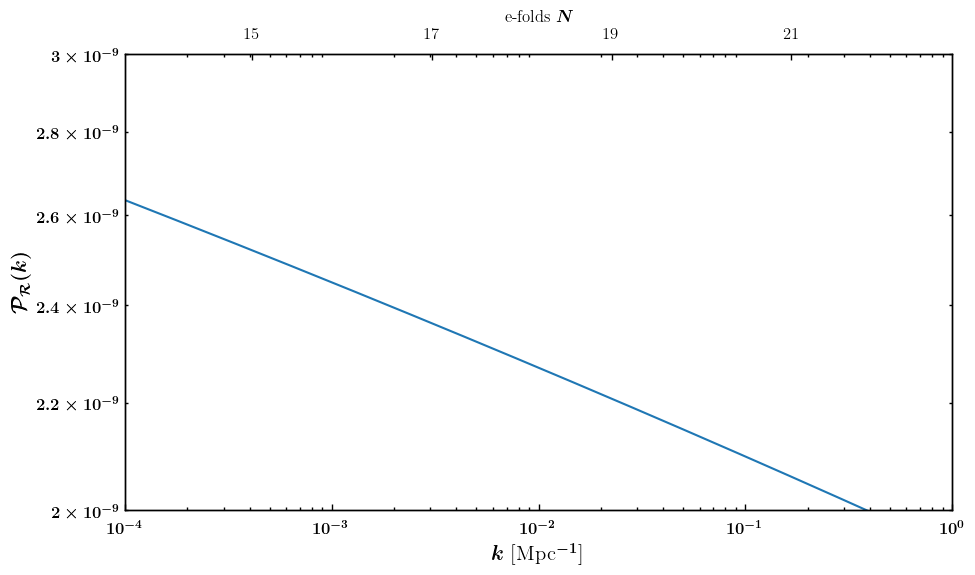

In [8]:
pert.Plot_spectrum(dpi = 100, spectrum = 'scalar', save=True)

In [9]:
print(pert.Spectral_tilts)

{'n_s': 0.9654184269128034, 'n_t': -0.0005392957780989852}
